In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Salaries.csv')
df.columns

Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


문제1. 모집단 총 개수 N = 26428
문제2. 변수의 개수 p = 5

In [0]:
df.columns

Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')

문제3. 2016년 선수 명수를 적으시오. 답 = 853

In [0]:
df.groupby('yearID').count().salary

yearID
1985     550
1986     738
1987     627
1988     663
1989     711
1990     867
1991     685
1992     769
1993     923
1994     884
1995     986
1996     931
1997     925
1998     998
1999    1006
2000     836
2001     860
2002     846
2003     827
2004     831
2005     831
2006     819
2007     842
2008     856
2009     813
2010     830
2011     839
2012     848
2013     815
2014     802
2015     817
2016     853
Name: salary, dtype: int64

문제4. 2016년 MLB연봉 데이터를 df16에 저장하시오. (df16이 모집단이 됦 것)

In [0]:
#방법1
df16 = df[df['yearID']==2016]
df16.shape

(853, 5)

In [0]:
#방법2
df16 = df[df.yearID==2016]
df16.shape

(853, 5)

In [0]:
print('세번째 선수 이름',df16.playerID.iloc[2])

세번째 선수 이름 brachsi01


In [0]:
df16.playerID.iloc[0]

'ahmedni01'

문제5. 2016년 MLB연봉 평균과 표준편차를 (화면)출력하시오.

In [0]:
df16.salary.describe()[1]

4396409.603751466

In [0]:
df16_stat = df16.salary.describe()

In [0]:
df16_stat

count    8.530000e+02
mean     4.396410e+06
std      5.900036e+06
min      5.075000e+05
25%      5.200000e+05
50%      1.500000e+06
75%      6.000000e+06
max      3.300000e+07
Name: salary, dtype: float64

In [0]:
#방법1
print('모집단평균=',df16_stat[1],', 모집단표준편차=',df16_stat[2])

모집단평균= 4396409.603751466 , 모집단표준편차= 5900036.049809601


In [0]:
#방법2
print('모집단평균=',df16.salary.mean(),', 모집단표준편차=',df16.salary.std())

모집단평균= 4396409.603751466 , 모집단표준편차= 5900036.049809601


문제6. 표본크기 = 0.7 * 모집단 개수 인 확률표본을 추출하자.

In [0]:
from sklearn.model_selection import train_test_split
df_sample, X_test = train_test_split(df16, test_size = 0.3)
print(df_sample.shape,'***',X_test.shape)
# 7(sample):3(test)으로 랜덤하게 나눔

(597, 5) *** (256, 5)


In [0]:
df_sample.salary.describe()

NameError: ignored

문제7. 2016년 MLB 선수연봉 히스토그램을 그리시오.

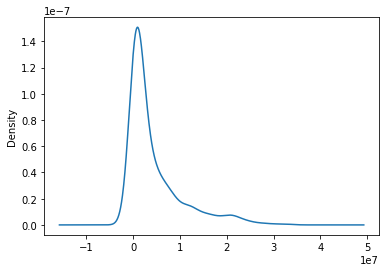

In [0]:
df16.salary.plot.kde() #probability density function kernel-density estimate

문제*. 2016년 MLB 선수(표본데이터) 히스토그램을 그리시오.

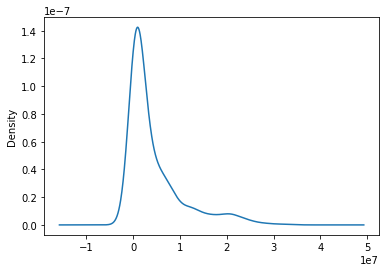

In [0]:
df_sample.salary.plot.kde()

문제9. 2016년 MLB선수 표본데이터 표본평균(X_ber)과 표준편차(sd)를 출력하시오.

In [0]:
print('표본평균 =',df_sample.salary.mean(),', 표준편차 s=',df_sample.salary.std())

표본평균 = 4393738.609715243 , 표준편차 s= 5958984.588126522


문제10. 선수들의 position data를 불러오시오. (position으로 저장하고, shape를 출력하시오.)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
people=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/People.csv')
people.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [0]:
people.shape

(19617, 24)

문제11. 포지션 데이터와 df16데이터를 combine하여 df16_position에 저장 후 shape 출력.

In [0]:
 df16_people = pd.merge(df16,people,how='inner',on='playerID')

In [0]:
df16_people.shape

(853, 28)

문제12. df불러오기, df16만들기, people불러오기, df16_people합치기 코드 정리하기

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Salaries.csv')
df16 = df[df.yearID==2016]
import pandas as pd
people=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/People.csv')
df16_people = pd.merge(df16,people,how='inner',on='playerID')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df16_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 0 to 852
Data columns (total 28 columns):
yearID          853 non-null int64
teamID          853 non-null object
lgID            853 non-null object
playerID        853 non-null object
salary          853 non-null int64
birthYear       853 non-null float64
birthMonth      853 non-null float64
birthDay        853 non-null float64
birthCountry    853 non-null object
birthState      824 non-null object
birthCity       853 non-null object
deathYear       3 non-null float64
deathMonth      3 non-null float64
deathDay        3 non-null float64
deathCountry    3 non-null object
deathState      3 non-null object
deathCity       3 non-null object
nameFirst       853 non-null object
nameLast        853 non-null object
nameGiven       853 non-null object
weight          853 non-null float64
height          853 non-null float64
bats            853 non-null object
throws          853 non-null object
debut           853 non-null object
f